# Анализ A/B теста


1. [Описание проекта](#description), 
2. [Описание данных](#description2)  
2. [Знакомство с данными, предварительная обработка и подготовка данных](#step1) 
2. [Часть 1. Приоритизация гипотез](#step2) 
2. [Часть 2. Анализ A/B теста](#step3) 
2. [Решение по результатам теста](#step4)


# Описание проекта<a name="description"></a>
__Контекст__

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

   - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
   - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
   - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

__Задача__
Проанализируйте A/B-тест:

   - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
   - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
   - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   - Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
   - Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
   - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
   - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
   - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
   - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
   - Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
   - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
   - Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
   - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
   - Примите решение по результатам теста и объясните его. Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.


# Описание данных<a name="description2"></a>
##### Данные для первой части

Файл /datasets/hypothesis.csv.

   __Hypothesis__ — краткое описание гипотезы;
   
   __Reach__ — охват пользователей по 10-балльной шкале;
   
   __Impact__— влияние на пользователей по 10-балльной шкале;
   
   __Confidence__ — уверенность в гипотезе по 10-балльной шкале;
   
   __Efforts__ — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


##### Данные для второй части

Файл /datasets/orders.csv. 

   __transactionId__ — идентификатор заказа;
   
   __visitorId__ — идентификатор пользователя, совершившего заказ;
   
   __date__ — дата, когда был совершён заказ;
   
   __revenue__ — выручка заказа;
   
   __group__ — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

   __date__ — дата;
   
   __group__ — группа A/B-теста;
   
   __visitors__ — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
current_palette = sns.color_palette()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.2f}'.format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


## Знакомство с данными, предварительная обработка и подготовка данных. <a name="step1"></a>


In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#изучим таблицу с гипотезами
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#познакомимся с данными о заказах
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
172,86411600,2096506107,2019-08-17,5480,B
942,2518211204,3077396270,2019-08-08,7240,B
866,707525727,1270030113,2019-08-30,3290,B
857,847315305,2780786433,2019-08-27,540,B
122,3024349788,3213691396,2019-08-22,12336,A


In [7]:
orders.duplicated().sum()

0

In [8]:
# приведем данные о дате заказа в формат datetime
orders['date'] = pd.to_datetime(orders['date'])

In [9]:
# познакомимся с данными о пользователях
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors.sample(5)

,date,group,visitors
25,2019-08-26,A,722
17,2019-08-18,A,668
28,2019-08-29,A,577
42,2019-08-12,B,543
50,2019-08-20,B,560


In [11]:
visitors.duplicated().sum()

0

In [12]:
# приведем данные о дате посещения  в формат datetime
visitors['date'] = pd.to_datetime(visitors['date'])

Выгрузили и изучили данные,дубликатов и пропусков нет, привели даты в формат datetime.

## Приоритизация гипотез. <a name="step2"></a>

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [13]:
hypothesis['num'] = hypothesis.index
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']

hypothesis.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,num,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,8,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,0,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,7,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,6,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,2,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,1,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,5,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,3,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,4,1.00


#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [14]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

hypothesis.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,num,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,7,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,2,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,0,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,6,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,8,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,3,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,1,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,5,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,4,1.00,3.00


#### Как изменилась приоритизация гипотез при применении RICE вместо ICE.

По фреймворку ICE наибольшую оценку имеют гипотезы 8,0 и 7. При использовании фреймворка RICE наибольшие оценки получили гипотезы 7,2 и 0. 

В отличии от ICE, RICE оценивает скольких пользователей затронет изменение, которое планируется внести. Это важный показатель , на которых повлияет изменение. Необходимо учитывать не только силу гипотезы, но и то, насколько много пользователей она затронет.
В нашем случае приоритет нужно отдать гипотезам:
 - №7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 
 - №2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
 - №0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

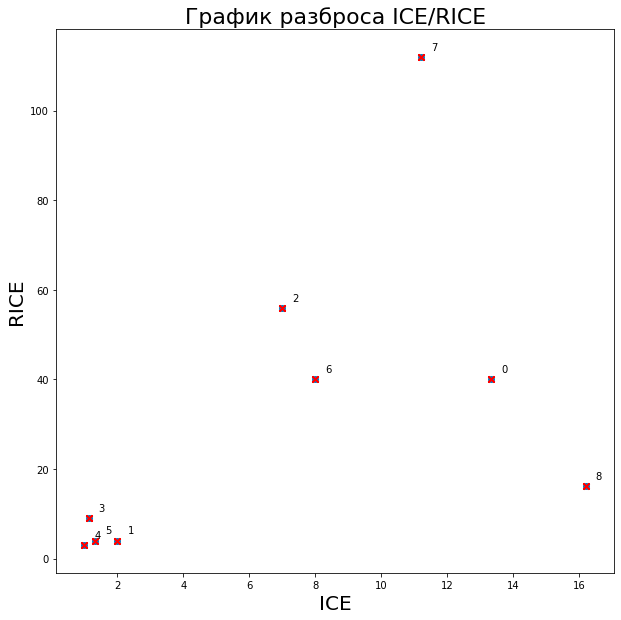

In [15]:
x = hypothesis['ICE'].values
y = hypothesis['RICE'].values
types = hypothesis.reset_index()['num'].values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y )

ax.set_xlabel('ICE', fontsize=20)
ax.set_ylabel('RICE', fontsize=20)
ax.set_title('График разброса ICE/RICE', fontsize=22)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points', ha='left', va='center')
    
    plt.scatter(x, y, marker='x', color='red')

## Часть 2. Анализ A/B-теста<a name="step3"></a>
    

Чтобы провести анализ A/B теста и построить графики, нужно собрать кумулятивные данные.Создадим  датафрейм __cumulativeData__ со столбцами

* date — дата;
* group — группа A/B-теста (A или B);
* orders — количество заказов в указанную дату в указанной группе;
* buyers — количество пользователей, совершивших хотя бы 1 заказ в указанную дату в указанной группе;
* revenue — выручка в указанную дату в указанной группе (средний чек);
* visitors — количество посетителей интернет-магазина в указанную дату в определённой группе.

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

In [17]:
#получаем кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

In [18]:
#получаем кумулятивные показатели из orders
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)

In [19]:
#объединяем данные в одну таблицу
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


__Построим графики кумулятивной выручки по дням и группам A/B-тестирования:__ 

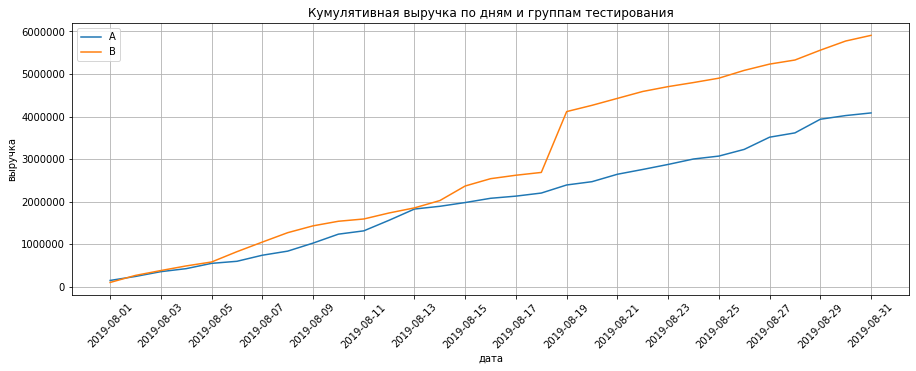

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим графики кумулятивной выручки по группам и дням
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(np.arange(cumulativeData['date'].min(), cumulativeData['date'].max() + pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45)
plt.title('Кумулятивная выручка по дням и группам тестирования')
plt.xlabel("дата")
plt.ylabel("выручка")
plt.grid()

plt.legend()
plt.show()

Выручка достаточно равномерно увеличивается в течение всего теста в обеих группах.
В период с 18 по 19 августа выручка группы B резко увеличилась. Это может означать либо резкий рост числа заказов, либо появление каких-то очень дорогих заказова в выборке.После 19 августа графики опять идут практически параллельно друг другу.

__Построим график кумулятивного среднего чека по группам.__

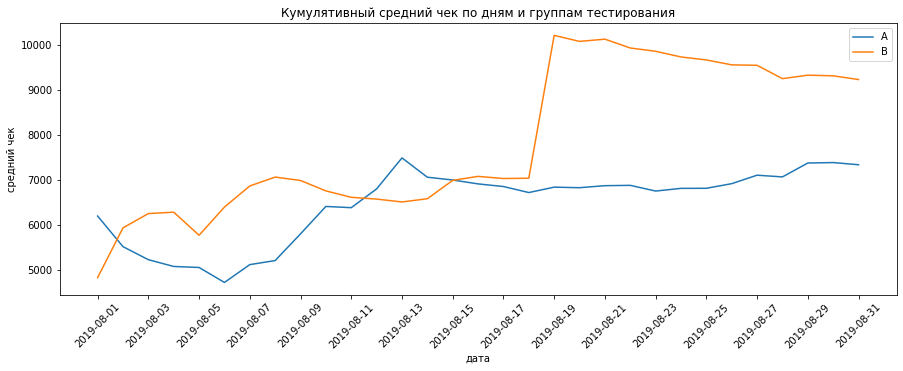

In [21]:
#разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(np.arange(cumulativeData['date'].min(), cumulativeData['date'].max() + pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45)
plt.title('Кумулятивный средний чек по дням и группам тестирования')
plt.xlabel("дата")
plt.ylabel("средний чек")
plt.legend(); 

Cудя по графику, средний чек до 18 по 19 августа колебался, а затем в группе В произошел резкий скачок, после которого средний чек начал постепенно снижаться. Скорее всего в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Похоже аномально большие заказы влияют на результаты тестирования. Для правильной оценки результатов нужно будет очистить данные от выбросов.

__Построим график относительного изменения кумулятивного среднего чека группы B к группе A.__ 

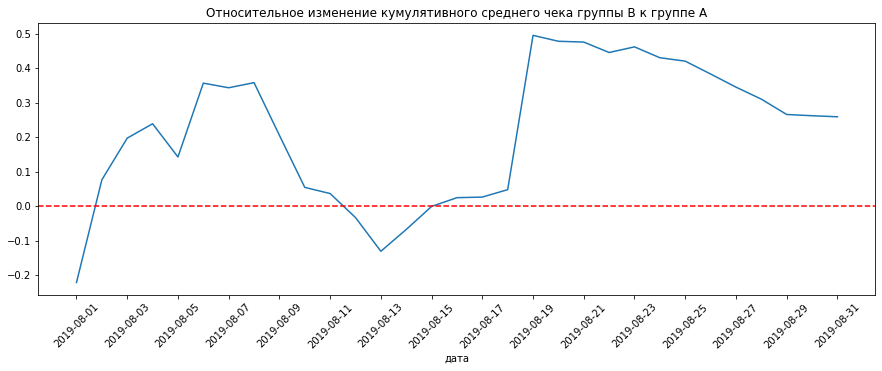

In [22]:
plt.figure(figsize=(15,5))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Добавим горизонтальную ось методом axhline()
plt.axhline(y=0, color='red', linestyle='--') 

plt.xticks(np.arange(cumulativeData['date'].min(), cumulativeData['date'].max() + pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel("дата"); 

В нескольких точках графика наблюдаются резкие колебания. Очевидно в выборке присутсттвуют выбросы. Найдём их позже.

__Построим график кумулятивной конверсии по группам.__

Проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0.25, 0.4]:

In [23]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [24]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

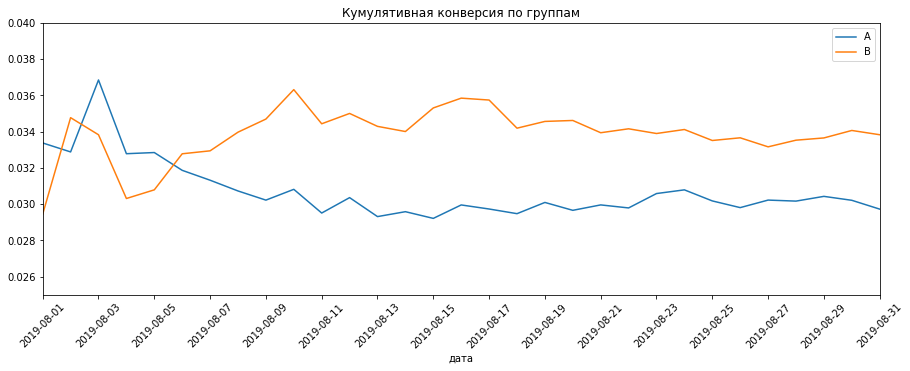

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", "2019-08-31", 0.025, 0.04]) 
plt.title('Кумулятивная конверсия по группам')
plt.xticks(np.arange(cumulativeData['date'].min(), cumulativeData['date'].max() + pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45)
plt.xlabel("дата"); 

В начале тестирования значения конверсия у группы А была выше, но затем конверсия группы В выросла и стабилизировалась, а конверсия группы А снизилась.Конверсия группы B в целом выше, чем конверсия группы A

__Построим график относительного различия кумулятивных конверсий:__

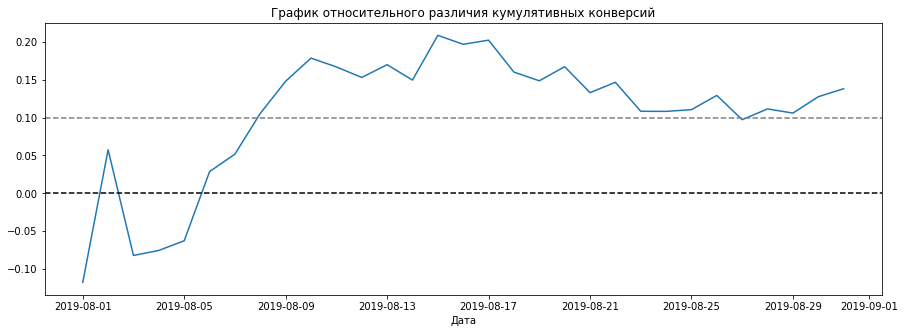

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], ((mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'])-1))
plt.title('График относительного различия кумулятивных конверсий')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата');


Конверсия группы в начале тестирования быля ниже, затем начинает расти и в целом превышает конверсию по группе А больше чем на 10%.

__Построим точечный график количества заказов по пользователям.__

In [27]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [28]:
#Подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = orders.groupby(['visitorId'], as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.head(5)


,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


In [29]:
ordersByUsers['orders'].max()

11

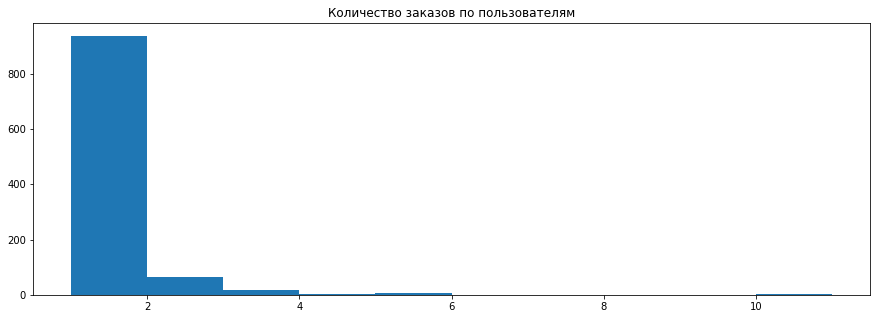

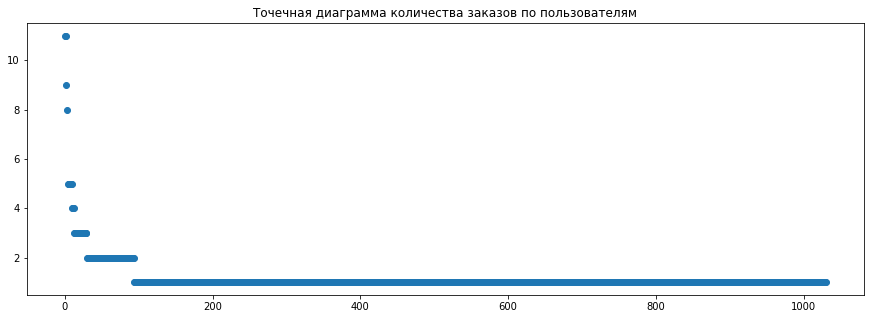

In [30]:
plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Количество заказов по пользователям');
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Точечная диаграмма количества заказов по пользователям');

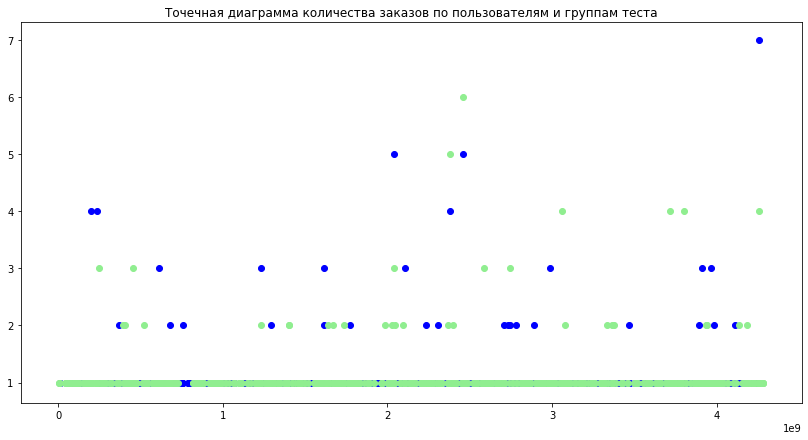

In [31]:
plt.figure(figsize=(14,7))
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
plt.scatter(ordersByUsersA['visitorId'], ordersByUsersA['orders'], c='blue')

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

plt.scatter(ordersByUsersB['visitorId'], ordersByUsersB['orders'], c='lightgreen')
plt.title('Точечная диаграмма количества заказов по пользователям и группам теста')

plt.show()

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна, максимальное же количество заказов на пользователя равно 11.

__Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Найдем границу для определения аномальных пользователей.__

In [32]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


95% пользователей совершает 2 заказа,при этом больше 4 заказов делает лишь 1% процент пользователей. в дальнейшем отфильтруем пользователей, возьмем только тех, кто совершил не больше 2 заказов.

__Построим точечный график стоимостей заказов__

In [33]:
#отсортируем заказы по размеру выручки и выведем 10 первых заказов
orders.sort_values(by='revenue',ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


In [34]:
orders['revenue'].describe()

count   1,197.00    
mean    8,348.01    
std     39,191.13   
min     50.00       
25%     1,220.00    
50%     2,978.00    
75%     8,290.00    
max     1,294,500.00
Name: revenue, dtype: float64

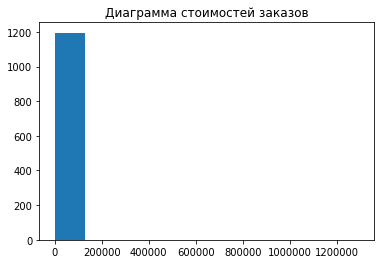

In [35]:
plt.hist(orders['revenue'])
plt.title('Диаграмма стоимостей заказов');

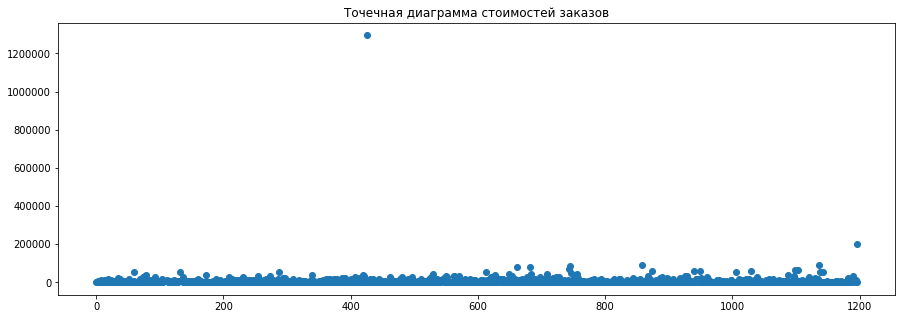

In [36]:
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимостей заказов');

Мы видим, что стоимость большинства заказов не превышает 100 000. но есть аномальные заказы, со стоимостью 1 294 500 и 202 740. Данные заказы явно являются аномалиями.

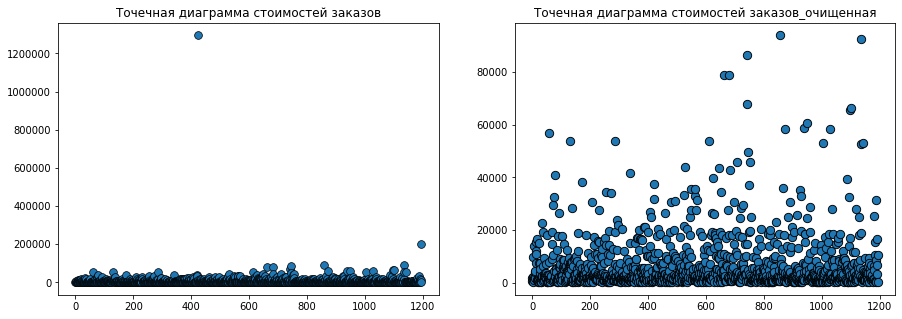

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(x_values, orders['revenue'],s=60, linewidths=.7, edgecolors='black')
plt.title('Точечная диаграмма стоимостей заказов');

plt.subplot(1, 2, 2)
orders_filtered = orders.loc[orders['revenue'] < 100000]
x_values2 = pd.Series(range(0,len(orders_filtered['revenue'])))
plt.scatter(x_values2, orders_filtered['revenue'],s=70, linewidths=.9, edgecolors='black')

plt.title('Точечная диаграмма стоимостей заказов_очищенная')
plt.show()

__Посчитаем 95-й и 99-й перцентили стоимости заказов. Найдем границу для определения аномальных заказов.__

In [38]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Стоимость 95 процентов заказов не превышает 28000, все заказы с большей стоимостью являются аномальными.

__Для последующего анализа объединим данные по количеству пользователей, заказов и выручки, а также кумулятивные показатели в один датафрейм data__

In [39]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']




In [40]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


In [41]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


В созданном датафрейме  __data__ у нас лежат следующие данные
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


__Определим статистическую значимость различий в конверсии между группами по «сырым» данным.__

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [42]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке по критерию Манна-Уитни

In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

 Воспользуемся критерием Манна-Уитни.
    
* H0: По "сырым" данным  разница в конверсии групп A и B статистически значима!
* H1: По "сырым" данным разница в конверсии групп A и B не определяется! 
    
Уровень статистической значимости    alpha=0.05


In [44]:
#Воспользуемся критерием Манна-Уитни.   
#H0: По "сырым" данным  разница в конверсии групп A и B статистически значима!
#H1: По "сырым" данным разница в конверсии групп A и B не определяется! 
print('\nОтносительный прирост конверсии группы B: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным  разница в конверсии групп A и B статистически значима!')
else:
    print('По "сырым" данным разница в конверсии групп A и B не определяется!')



Относительный прирост конверсии группы B: 0.138
P-value: 0.008
По "сырым" данным  разница в конверсии групп A и B статистически значима!


P-value значительно меньше 0.05. Мы отвергаем нулевую гипотезу и считаем, что разница в конверсии групп A и B статистически значима

__Определим статистическую значимость различий в среднем чеке между группами по «сырым» данным.__

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.Также найдём относительные различия в среднем чеке между группами.

Воспользуемся критерием Манна-Уитни.
    
* H0: Средний чек группы A не больше, чем средний чек группы B
* H1: Средний чек группы A не больше, чем средний чек группы B

 Уровень статистической значимости    alpha=0.05


In [45]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек группы A не больше, чем средний чек группы B
# H1: Средний чек группы A не больше, чем средний чек группы B
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('P-value: {0:.3f}'.format(results.pvalue))
if (pvalue < alpha):
    print('По "сырым" данным  разница в среднем чеке групп A и B статистически значима')
else:
    print('По "сырым" данным  разница в среднем чеке групп A и B не определяется')
    
print("Отношение среднего чека В и А = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.365
По "сырым" данным  разница в среднем чеке групп A и B не определяется
Отношение среднего чека В и А = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Тем не менее, средний чек группы B значительно выше среднего чека группы A.

__Очистим данные от выбросов и посчитаем статистическую значимость различий в конверсии  и статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.__ 

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 25 000 рублей (по рассчитаным ранее 95-м процентилям). Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

In [46]:
#определим аномальные количества заказов и суммы покупки для формирования списка аномальных пользователей. Также определим количество аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.shape


(68,)

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [47]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 


Воспользуемся критерием Манна-Уитни.
    
* H0: По "очищенным" данным  разница в конверсии групп A и B статистически значима!
* H1: По "очищенным" данным разница в конверсии групп A и B не определяется!

Уровень статистической значимости    alpha=0.05


In [48]:
# Воспользуемся критерием Манна-Уитни
# H0: По "очищенным" данным  разница в конверсии групп A и B статистически значима!
# H1: По "очищенным" данным разница в конверсии групп A и B не определяется!
print('\nОтносительный прирост конверсии группы B по "очищенным данным": {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "очищенным" данным  разница в конверсии групп A и B статистически значима!')
else:
    print('По "очищенным" данным разница в конверсии групп A и B не определяется!')



Относительный прирост конверсии группы B по "очищенным данным": 0.204
P-value: 0.006
По "очищенным" данным  разница в конверсии групп A и B статистически значима!


По очищенным данным P-value по-преднему значительно меньше 0.05. Мы отвергаем нулевую гипотезу и считаем, что разница в конверсии групп A и B статистически значима. Результаты по конверсии практически не изменились, относительные прирост конверсии по очищенным данным стал выше. 

Посмотрим, что стало со средним чеком

Воспользуемся критерием Манна-Уитни.
    
* H0: Средний чек группы A не больше, чем средний чек группы B
* H1: Средний чек группы A не больше, чем средний чек группы B

  Уровень статистической значимости    alpha=0.05


In [49]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек группы A не больше, чем средний чек группы B
# H1: Средний чек группы A не больше, чем средний чек группы B
alpha = 0.05
results = stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

#pvalue = results.pvalue
print('P-value: {0:.3f}'.format(results.pvalue))
if (pvalue < alpha):
    print('По "очищенным" данным  разница в среднем чеке групп A и B статистически значима')
else:
    print('По "очищенным" данным  разница в среднем чеке групп A и B не определяется')
    
print('Отношение среднего чека В и А по "очищенным данным" = {0:.3f}'.format(orders[np.logical_and(
    orders['group']=='B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

P-value: 0.394
По "очищенным" данным  разница в среднем чеке групп A и B не определяется
Отношение среднего чека В и А по "очищенным данным" = -0.017


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. После удаления выбросов отношение среднего чека группы B к среднему чеку группы A изменилось, средний чек в группе B практически равен среднему чеку в группе А (разница составляет 1,7%)

# Решение по результатам теста <a name="step4"></a>


 __Варианты решений__
 * Остановить тест, зафиксировать победу одной из групп.
 * Остановить тест, зафиксировать отсутствие различий между группами.
 * Продолжить тест.

__Какие выводы по тесту можем сделать?__
Имеющиеся факты:
* Есть статистически значимые различия по конверсии между группами по «сырым» данным, и по данным после фильтрации аномалий;конверсия группы В выше, чем у группы A
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
Исходя из данных фактов, тест следует остановить и признать успешным (зафиксировать победу группы В). 